# Homework 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Exercise 10.10:

**Problem 6:**    Consider the simple function R(β) = sin(β) + β/10.

**(a)** Draw a graph of this function over the range β ∈ [−6, 6].

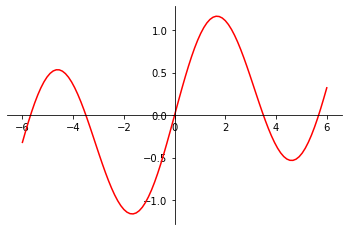

In [8]:
# 100 linearly spaced numbers
x = np.linspace(-6,6,100)

# the function
y = np.sin(x) + (x/10)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

**(b)** What is the derivative of this function? <br/>
R(β) = cos(β) + 1/10

**(c)** Given β<sup>0</sup> = 2.3, run gradient descent to find a local minimum
of R(β) using a learning rate of ρ = 0.1. Show each of β<sup>0</sup>, β<sup>1</sup>,...
in your plot, as well as the final answer.

In [ ]:
#TO-DO

**(d)** Repeat with β<sup>0</sup> = 1.4.

In [ ]:
#TO-DO

**Problem 7:** Fit a neural network to the Default data. Use a single hidden layer
with 10 units, and dropout regularization. Have a look at Labs 10.9.1–
10.9.2 for guidance. Compare the classification performance of your
model with that of linear logistic regression.

In [46]:
#TO-DO
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../Data/Default.csv')
df['default'] = df['default'].replace(to_replace=['No', 'Yes'], value=[1, 2])
df['student'] = df['student'].replace(to_replace=['No', 'Yes'], value=[1, 2])

X = df[['student', 'balance', 'income']]
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())
predictions = mlp.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1929    8]
 [  49   14]]
              precision    recall  f1-score   support

           1       0.98      1.00      0.99      1937
           2       0.64      0.22      0.33        63

    accuracy                           0.97      2000
   macro avg       0.81      0.61      0.66      2000
weighted avg       0.96      0.97      0.96      2000



**Problem 12:** Consider the RNN fit to the NYSE data in Section 10.9.6. Modify the
code to allow inclusion of the variable day of week, and fit the RNN.
Compute the test R<sup>2</sup>.

      Unnamed: 0        date  day_of_week  DJ_return  log_volume  \
0              1  1962-12-03            1  -0.004461    0.032573   
1              2  1962-12-04            2   0.007813    0.346202   
2              3  1962-12-05            3   0.003845    0.525306   
3              4  1962-12-06            4  -0.003462    0.210182   
4              5  1962-12-07            5   0.000568    0.044187   
...          ...         ...          ...        ...         ...   
6046        6047  1986-12-24            3   0.006514   -0.236104   
6047        6048  1986-12-26            5   0.001825   -1.322425   
6048        6049  1986-12-29            1  -0.009515   -0.371237   
6049        6050  1986-12-30            2  -0.001837   -0.385638   
6050        6051  1986-12-31            3  -0.006655   -0.264986   

      log_volatility  train  
0         -13.127403   True  
1         -11.749305   True  
2         -11.665609   True  
3         -11.626772   True  
4         -11.728130   True  
...

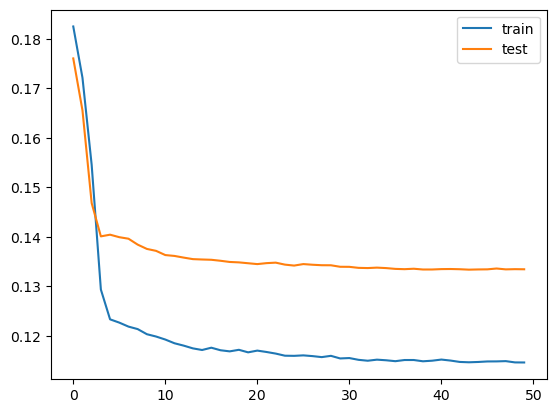

56/56 [==============================] - 1s 2ms/step
Test RMSE: 0.182


In [5]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import re

# Load the dataset
my_df = pd.read_csv('../Data/NYSE.csv')
my_df['day_of_week'] = my_df['day_of_week'].replace(to_replace=['mon', 'tues', 'wed', 'thur', 'fri'], value=[1, 2, 3, 4, 5])
print(my_df)

# Load all needed information
L = my_df.loc[:,['DJ_return','log_volume','log_volatility','train', 'day_of_week']]
print(L)


# Create lagged sequences 
L['v1']=L.loc[:,'log_volume'].shift(1)
L['v2']=L.loc[:,'log_volume'].shift(2)
L['v3']=L.loc[:,'log_volume'].shift(3)
L['v4']=L.loc[:,'log_volume'].shift(4)
L['v5']=L.loc[:,'log_volume'].shift(5)
L['r1']=L.loc[:,'DJ_return'].shift(1)
L['r2']=L.loc[:,'DJ_return'].shift(2)
L['r3']=L.loc[:,'DJ_return'].shift(3)
L['r4']=L.loc[:,'DJ_return'].shift(4)
L['r5']=L.loc[:,'DJ_return'].shift(5)
L['z1']=L.loc[:,'log_volatility'].shift(1)
L['z2']=L.loc[:,'log_volatility'].shift(2)
L['z3']=L.loc[:,'log_volatility'].shift(3)
L['z4']=L.loc[:,'log_volatility'].shift(4)
L['z5']=L.loc[:,'log_volatility'].shift(5)
L['c1']=L.loc[:,'day_of_week'].shift(1)
L['c2']=L.loc[:,'day_of_week'].shift(2)
L['c3']=L.loc[:,'day_of_week'].shift(3)
L['c4']=L.loc[:,'day_of_week'].shift(4)
L['c5']=L.loc[:,'day_of_week'].shift(5)


print(L)
L=L.dropna()
print(L)

train_X = L[L['train']==True]
test_X = L[L['train']==False]
train_y = train_X.loc[:,['log_volume']]
test_y = test_X.loc[:,['log_volume']]

train_X=train_X.drop(columns=['train','log_volume','DJ_return','log_volatility', 'day_of_week'])
test_X=test_X.drop(columns=['train','log_volume','DJ_return','log_volatility', 'day_of_week'])


# convert dataframe to ndarray thus reshape() is possible
train_X=train_X.values
test_X=test_X.values


train_X = train_X.reshape((train_X.shape[0], 5, 4))
test_X = test_X.reshape((test_X.shape[0], 5, 4))
print(train_X.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# make a prediction
yhat = model.predict(test_X)

# calculate RMSE
rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)